# KNN

K-Nearest Neighbor, KNN) K-최근접 이웃

- 유유상종 : 같은 날개를 가진 새들끼리 함께 모인다!
- 기존의 데이터 중 가장 가까운 k개를 바탕으로 새로운 데이터를 예측하고 분류하는 알고리즘
- 지도학습 알고리즘 중 하나
    - 거리기반으로 학습을 하는 Clustering과 유사하나 supervised / unsupervised learning이라는 점에서 차이가 있다.
- 새로운 데이터가 주어지면 그제야 주변의 k개 데이터를 보고 새로운 데이터를 분류하기 때문에 사전 모델링이 필요 없는 real-time 예측이 이루어진다.
- 모델을 별도로 구축하지 않기 때문에 Lazy model이라고 부른다.

KNN에서는 데이터들 사이의 거리를 구해야한다. 
1. 유클리디안 거리(Euclidean Distance)
<img src = "./euclidean.png" width = "50%" height = "50%">
2. 맨하튼 거리(Manhattan Distance)
<img src = "./manhatan.png" width = "50%" height = "50%">

# KNN의 장/단점

- 장점
    - 단순하고 효율적이다
    - 훈련이 빠르다
    - 기저데이터 분포에 대한 가정을 하지 않는다
    
- 단점
    - 모델을 생성하지 않아 특징과 클래스간 관계를 이해하는 데 제한적이다
    - 적절한 k의 선택이 필요하다
    - 데이터가 많아지면 분류단계가 느리다

In [2]:
import os
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from pandas import DataFrame, merge

In [30]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
predictors=iris['feature_names']
X = df[predictors]
y = df['target']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### k의 값

- k의 값은 짝수보다는 홀수로 선정하는 것이 좋음
- 만일 짝수일 경우 선정한 데이터가 동점인 경우가 만들어져서 데이터를 분류할 수 없는 경우가 생기기 때문이다 

In [34]:
knn_clf = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2)
knn_clf.fit(X_train,y_train)

pred_y = knn_clf.predict(X_test)
pred_y_prob = knn_clf.predict_proba(X_test)

rdf = DataFrame({'실제값':y_test, 'KNN_분류값':pred_y})

/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [44]:
rdf.head()

,실제값,KNN_분류값
51,1,1
17,0,0
110,2,2
94,1,1
86,1,1


In [36]:
print("prameter : n_neighbors=3, weights='uniform', p=2")
print("-"*30)
print("accuracy", knn_clf.score(X_test,y_test))

prameter : n_neighbors=3, weights='uniform', p=2
------------------------------
accuracy 0.9666666666666667


/home/aix23908/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


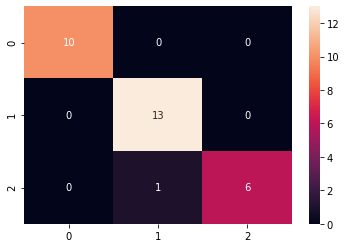

In [38]:
import seaborn as sns

cm = confusion_matrix(y_test, pred_y)
sns.heatmap(cm, annot=True)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



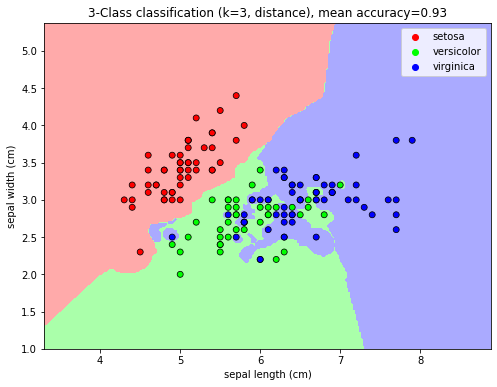

In [42]:
# 시각화를 위한 패키지
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np
 
# K-최근접이웃 분류의 시각화를 좌표평면에 하기 위해서는 예측변수를 2개까지만 사용할 수 있음
# sepal length (cm)와 sepal width (cm)의 값만 뽑아 2차 배열로 변환
X2 = np.array(df[predictors[0:2]])
 
# color map 설정
cmap_light = ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"])
cmap_bold = ["#FF0000","#00FF00","#0000FF"]
 
# 앞서 정확도가 가장 높았던 파라미터를 입력함
knn_clf2 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
knn_clf2.fit(X2, y)
 
# 분류 경계를 색으로 구분하기 위한 작업
h = .02  # step size in the mesh
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn_clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
 
# 분류 경계 별 색칠하기
plt.contourf(xx, yy, Z, cmap=cmap_light)
 
# 각 훈련값의 좌표들을 그린 산점도
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
 
# 제목에 KNN 분류 파라미터와 표준 정확도 표기
plt.title("3-Class classification (k=3, distance), mean accuracy=%0.2f" %knn_clf2.score(X2, y))
plt.xlabel(predictors[0])
plt.ylabel(predictors[1])
 
plt.show()


# KNN 주의점

- 거리기반 모델이기 때문에 표준화가 필요하다
    -> 변수의 값을 표준 범위로 재조정하기 위해 정규화를 적용
- A 변수와 B변수의 범위의 차이가 클 때, 범위를 조정하지 않으면 범위가 더 큰 B의 수치가 거리 함수에 훨씬 더 많은 영향을 미치게 된다
    -> 대부분의 데이터가 B로 구분할 오류가 발생할 수 있다.